### Test 
- Calculate the ground-state energy of the $H_2$ molecule at various bond-lengths


In [1]:
import strayqat as sq
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
mol = sq.Molecule()
# リスト初期化
fci_eng = []
hf_eng=[]
vqe_eng = []
r = []
r_max=2.5
r_min=0.3
r_bins=30

In [3]:
for i in range(r_bins):
    dist = r_min + (r_max-r_min)/r_bins*i
    r.append(dist)
    mol.geometry=[['H',[0,0,0]],['H',[dist,0,0]]]
    mol.multiplicity = 1
    mol.charge = 0
    mol.basis='sto-3g'
    mol.run_qchem()
    fci_eng.append(mol.fci_energy)
    hf_eng.append(mol.hf_energy)

In [4]:
print(mol)

{'basis': 'sto-3g', 'multiplicity': 1, 'charge': 0, 'geometry': [['H', [0, 0, 0]], ['H', [2.4266666666666663, 0, 0]]], 'n_active_electrons': None, 'n_active_orbitals': None}


In [5]:
#VQE
vqe_eng = []
for i in range(r_bins):
    dist = r_min + (r_max-r_min)/r_bins*i
    # 各原子間距離でのH2のCAS(2,2)空間でのVQE計算
    mol.geometry=[['H',[0,0,0]],['H',[dist,0,0]]]
    mol.n_active_electrons = 2
    mol.n_active_orbitals = 2
    mol.run_scf()
    qubit_num = mol.n_qubits #VQE計算に必要なqubit
    hamil = mol.hamiltonian  #CAS(2,2)でのhamiltonianの構築
    
    # EleQtronのVqeクラスのインスタンス化
    vqe = sq.Vqe()
    vqe.n_qubit = qubit_num
    vqe.maxiter = 200
    vqe.gtol = 1e-6
    vqe.depth = 6
    vqe.method = 'BFGS' 
    vqe.gpu = False
    vqe.ansatz_type = 'UCC1'  # ansatzは'HE'か'SYMP'(HE:Hardware Efficiency,SYMP:Symmetry Preserving)
    vqe.hamiltonian = hamil
    vqe.noise = False
    vqe.run()
    vqe_eng.append(vqe.cost_history[-1])


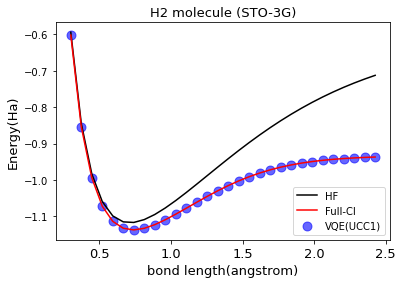

In [6]:
#plot r vs.HF, FCI, VQE
plt.plot(r, hf_eng,color='black',label='HF')
plt.plot(r, fci_eng,color='red',label='Full-CI')
plt.scatter(r,vqe_eng,color='blue',label='VQE(UCC1)',alpha=0.6, s=80.0)
plt.legend()

plt.xlabel('bond length(angstrom)', fontsize=13)
plt.xticks(fontsize= 13)
plt.ylabel('Energy(Ha)', fontsize=13)
plt.title('H2 molecule (STO-3G)', fontsize=13)
plt.yticks(fontsize= 10)

#plt.savefig("image.png", format="png", dpi=600)